# Классификация клиентов банка - прогнозирование оттока

## Постановка задачи
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт ли клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

<i>Примечание</i>: такого банка в реальности не существует. Данные о его клиентах вымышлены (синтезированы).

Данная задача была предложена в рамках курса Университета Национальной Технологической Инициативы (НТИ) 2035 
https://edu.2035.university/course/UNIVERSITY2035/II2020_5/

### В каком виде хранятся исходные данные?

Обычно в задаче анализа данных имеется некоторая прямоугольная таблица. Ее строки соответствуют объектам, а столбцы – признакам этих объектов. Объекты также называются наблюдениями или примерами (samples), а признаки – атрибутами (features).

Признаки бывают количественными (как, например, доход в рублях или рост в сантиметрах и т.д.) или категориальными (как, например, марка автомобиля, модель телефона и т.д.).

Один из признаков (столбцов) выделен. Этот признак называется ответом. Остальные признаки – входные. Требуется по имеющейся таблице научиться по новому объекту, которого нет в таблице, но для которого известны значения входных признаков, по возможности с небольшой ошибкой предсказывать значение выделенного признака (ответа).

Если ответ количественный, то задача называется задачей восстановления регрессии. Если ответ категориальный, то задача называется задачей классификации.

Взято из руководства https://mlbootcamp.ru/ru/article/tutorial/

### Описание данных

Признаки:
- RowNumber – индекс строки в данных
- CustomerId – уникальный идентификатор клиента
- Surname – фамилия
- CreditScore – кредитный рейтинг
- Geography – страна проживания
- Gender – пол
- Age – возраст
- Tenure – количество недвижимости у клиента
- Balance – баланс на счёте
- NumOfProducts -количество продуктов банка, используемых клиентом
- HasCrCard – наличие кредитной карты
- IsActiveMember – активность клиента
- EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:
- Exited – факт ухода клиента

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение моделей (models fitting)
- прогнозирование (prediction)

## Подключение модулей

Для решения задачи анализа данных воспользуемся библиотеками numpy, pandas и scikit-learn. Библиотека numpy содержит реализации многомерных массивов и алгоритмов линейной алгебры. Библиотека pandas предоставляет широкий спектр функций по обработке табличных данных. Библиотека scikit-learn реализует множество алгоритмов машинного обучения. Кроме того, нам понадобится библиотека matplotlib для научной визуализации.

Наиболее простой способ получить все требуемые библиотеки в python – установить дистрибутив anaconda

In [1]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [2]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('Churn_Modelling.csv', sep = ';')

In [3]:
# проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Разведочный анализ данных (РАД, EDA)

На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- для задач классификации: сколько у нас классов - два или больше? Сбалансированы ли классы?
- и др.

В зависимости от формы представления результатов РАД можно разделить на:
- числовой/табличный анализ
- визуальный (графический) анализ

В зависимости от кол-ва одновременно исследуемых признаков РАД можно разделить на:
- одномерный анализ (univariate analysis) - исследование каждого признака в отдельности
- двумерный анализ (bivariate analysis) - исследование взаимного влияния признаков и сравнение их характеристик
- многомерный анализ (multivariate analysis) - сравнение статистических характеристик нескольких признаков 

In [4]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(10000, 14)

In [5]:
# выводим типы данных
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# целевой признак - Exited

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# имена колонок в виде списка
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# сколько пропусков в колонке CreditScore ?
df['CreditScore'].isna().sum()

0

In [10]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке RowNumber = 0
Кол-во пропусков в колонке CustomerId = 0
Кол-во пропусков в колонке Surname = 0
Кол-во пропусков в колонке CreditScore = 0
Кол-во пропусков в колонке Geography = 0
Кол-во пропусков в колонке Gender = 0
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке Tenure = 0
Кол-во пропусков в колонке Balance = 0
Кол-во пропусков в колонке NumOfProducts = 0
Кол-во пропусков в колонке HasCrCard = 0
Кол-во пропусков в колонке IsActiveMember = 0
Кол-во пропусков в колонке EstimatedSalary = 0
Кол-во пропусков в колонке Exited = 0


In [11]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# сколько уникальных значений в колонке Geography? 
df['Geography'].nunique()

3

In [13]:
# Какие это значения?
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
# какова статистика распределения этих значений? (сколько каких значений)
df['Geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [15]:
# исследование целевого (target) признака - факта ухода клиента 
print('кол-во уникальных значений в таргете: ', df['Exited'].nunique())
print('перечень уникальных значений в таргете: ', df['Exited'].unique())
print('статистика распределения значений в таргете: \n', df['Exited'].value_counts(normalize=True))

кол-во уникальных значений в таргете:  2
перечень уникальных значений в таргете:  [1 0]
статистика распределения значений в таргете: 
 0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [16]:
# описательная статистика для признака Age
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [17]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Визуальный анализ

<AxesSubplot:>

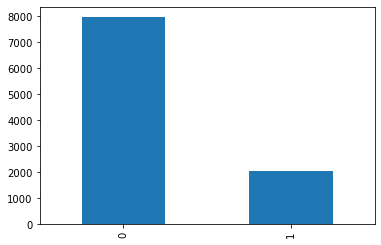

In [18]:
df['Exited'].value_counts(normalize=False).plot.bar()

<AxesSubplot:ylabel='Geography'>

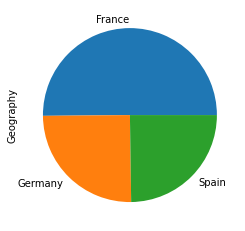

In [19]:
df['Geography'].value_counts(normalize=True).plot.pie()

In [20]:
df['Age'].nunique()

70

<AxesSubplot:>

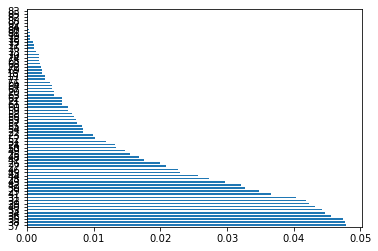

In [21]:
df['Age'].value_counts(normalize=True).plot.barh()

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

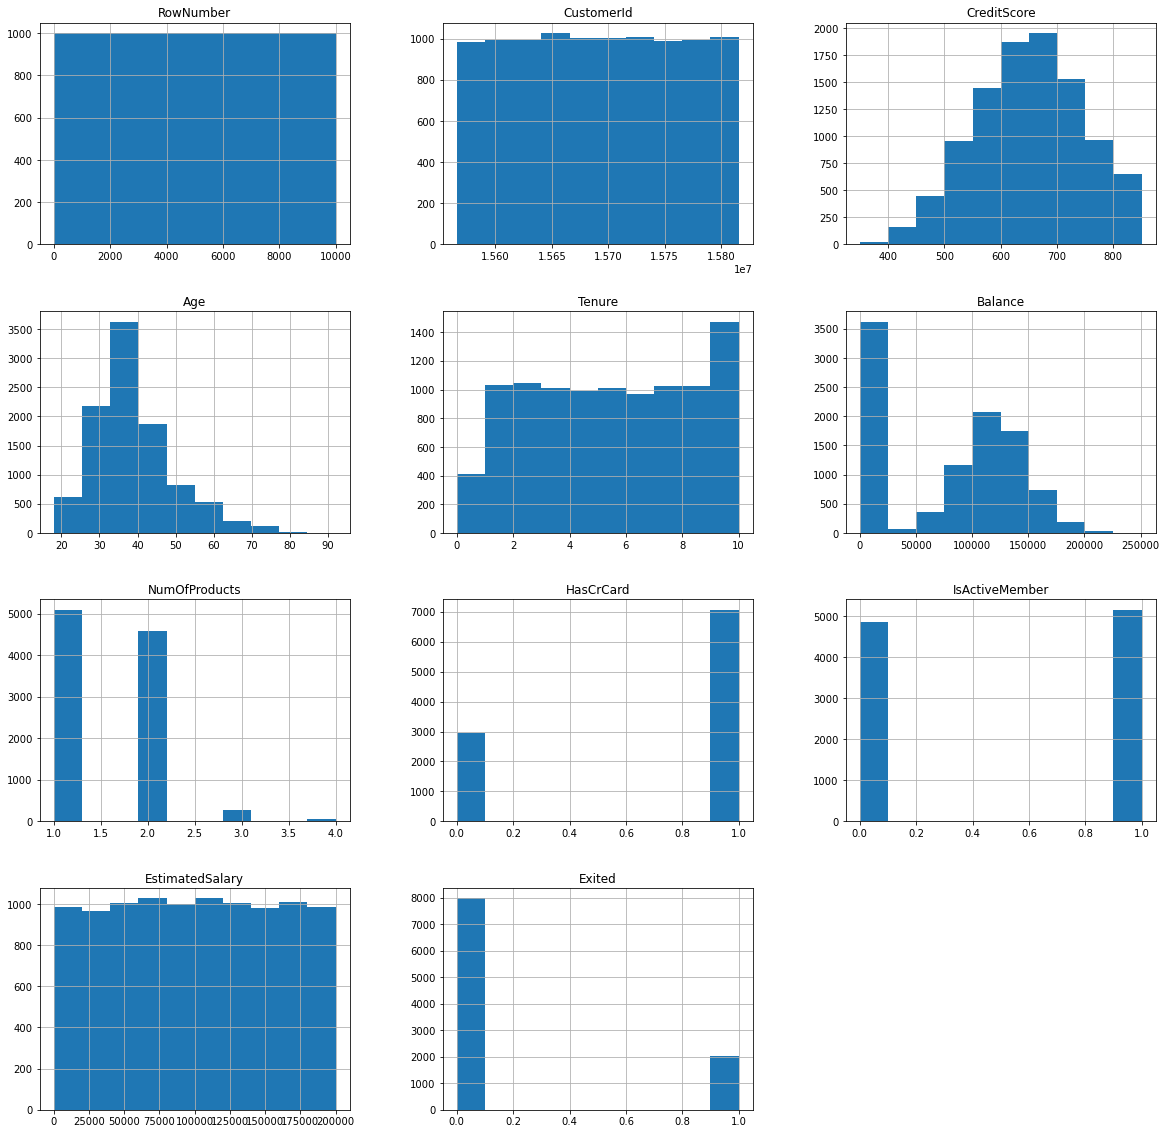

In [22]:
# гистаграммы всех признаков
df.hist(figsize=(20,20))

<AxesSubplot:>

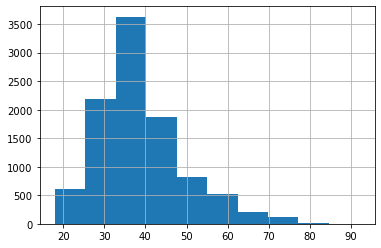

In [23]:
# гистаграмма для 1 признака
df['Age'].hist()

<AxesSubplot:>

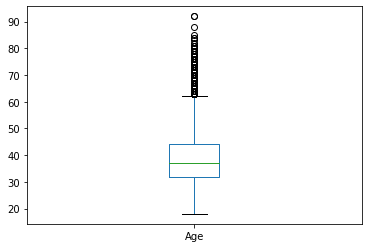

In [24]:
# "ящик с усами" (boxplot) для визуализации распределения вероятностей значений признака
df['Age'].plot.box()

<AxesSubplot:ylabel='Density'>

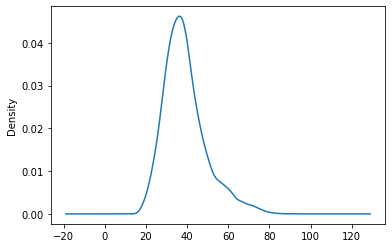

In [25]:
# график плотности распределения признака
df['Age'].plot.density()

<AxesSubplot:ylabel='Age'>

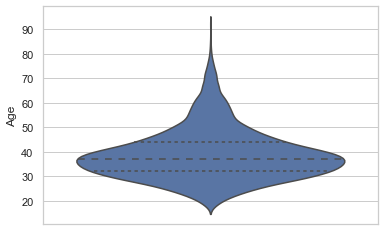

In [26]:
# применяем тему со светлыми линиями сетки
sns.set_theme(style="whitegrid")

# строим диаграмму violin plot ("скрипичная диаграмма")
sns.violinplot(y=df["Age"], inner="quartile")

### Двумерный анализ признаков

In [27]:
# список признаков для анализа
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_num']

In [28]:
# создание новой колонки Geography_num и замена символьных значений на целочисленные
df['Geography_num'] = df['Geography']

df['Geography_num'].replace('France', 0, inplace=True)
df['Geography_num'].replace('Spain', 1, inplace=True)
df['Geography_num'].replace('Germany', 2, inplace=True)

In [29]:
# матрица коррелаций
corr = df[features_eda].corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.008267
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.048092
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.001418
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.348700
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.006180
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.004036
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.012692
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.007382
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.153771
Geography_num,0.008267,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771,1.000000


<AxesSubplot:>

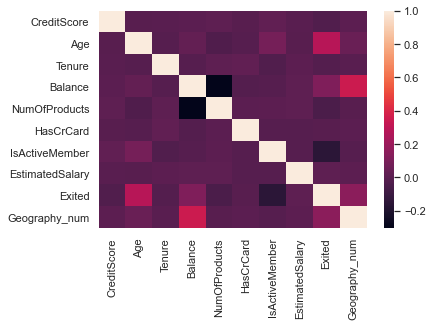

In [30]:
# тепловая карта корреляций между признаками
sns.heatmap(corr)

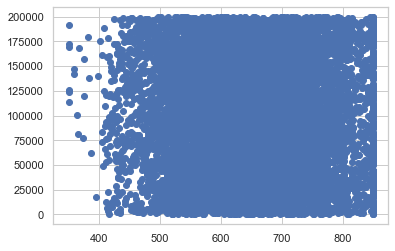

In [31]:
# диаграмма рассеяния для 2х признаков
plt.scatter(df['CreditScore'], df['EstimatedSalary'])

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

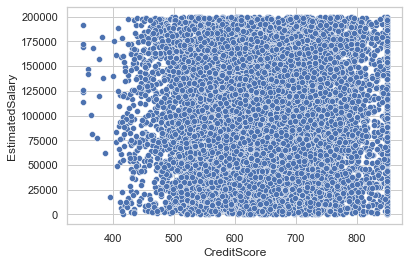

In [32]:
# диаграмма рассеяния для 2х признаков средствами библиотеки seaborn 
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary")

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

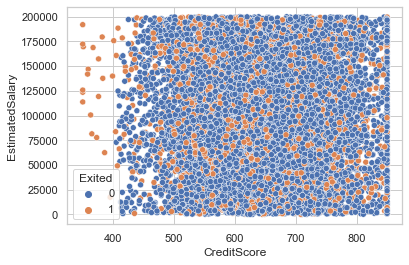

In [33]:
# цвета точек зависят от класса объекта (ушёл клиент или нет)
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary", hue="Exited") # , style="Exited"

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

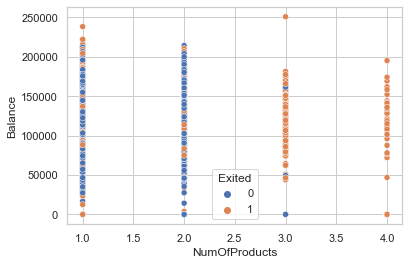

In [34]:
sns.scatterplot(data=df, x="NumOfProducts", y="Balance", hue="Exited") # Exited IsActiveMember HasCrCard 

<AxesSubplot:xlabel='Exited', ylabel='Age'>

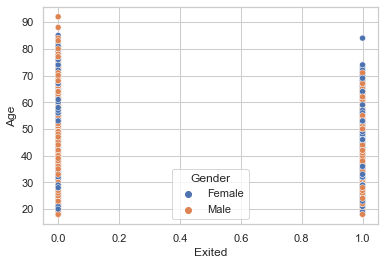

In [35]:
sns.scatterplot(data=df, x="Exited", y="Age", hue="Gender")

<AxesSubplot:xlabel='Geography_num', ylabel='Balance'>

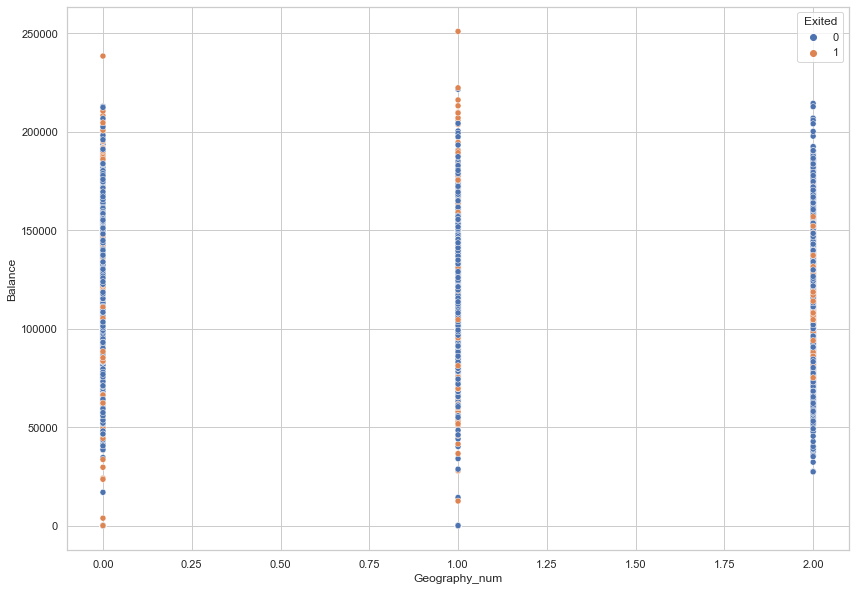

In [36]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="Geography_num", y="Balance", hue="Exited")

array([[<AxesSubplot:xlabel='CreditScore', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Age', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Tenure', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Balance', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='NumOfProducts', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='HasCrCard', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='IsActiveMember', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Exited', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Geography_num', ylabel='CreditScore'>],
       [<AxesSubplot:xlabel='CreditScore', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Tenure', ylabel='Age'>,
        <AxesSubplot:xlabel='Balance', ylabel='Age'>,
        <AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>,
        <AxesSubplot:xlabel='HasCrCard', ylabel='Age'>,
        <AxesSubplot:

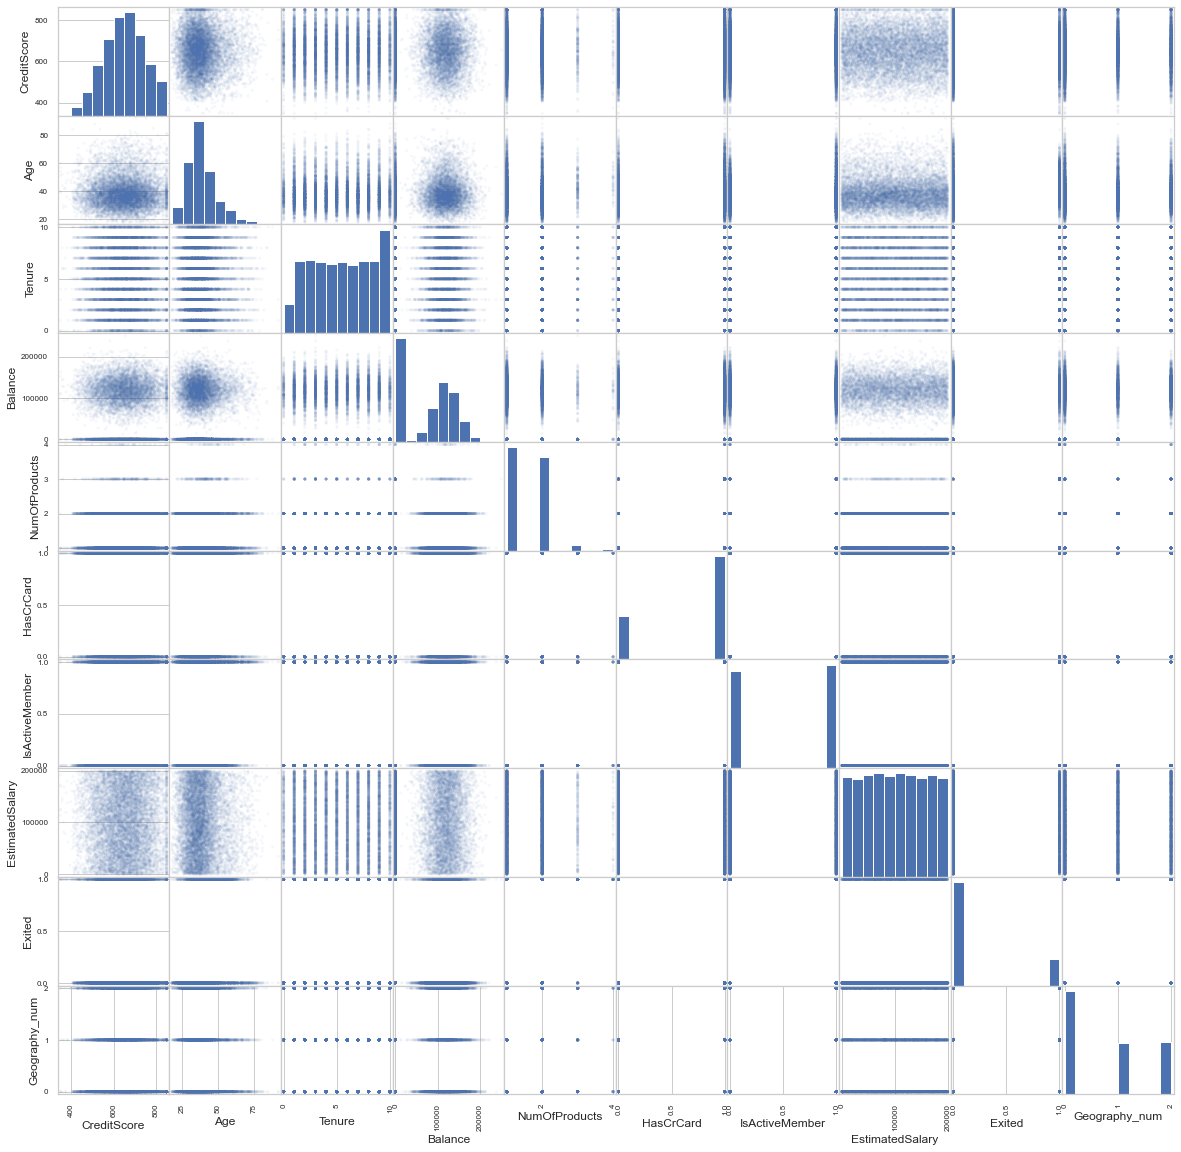

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[features_eda], alpha=0.05, figsize=(20, 20))

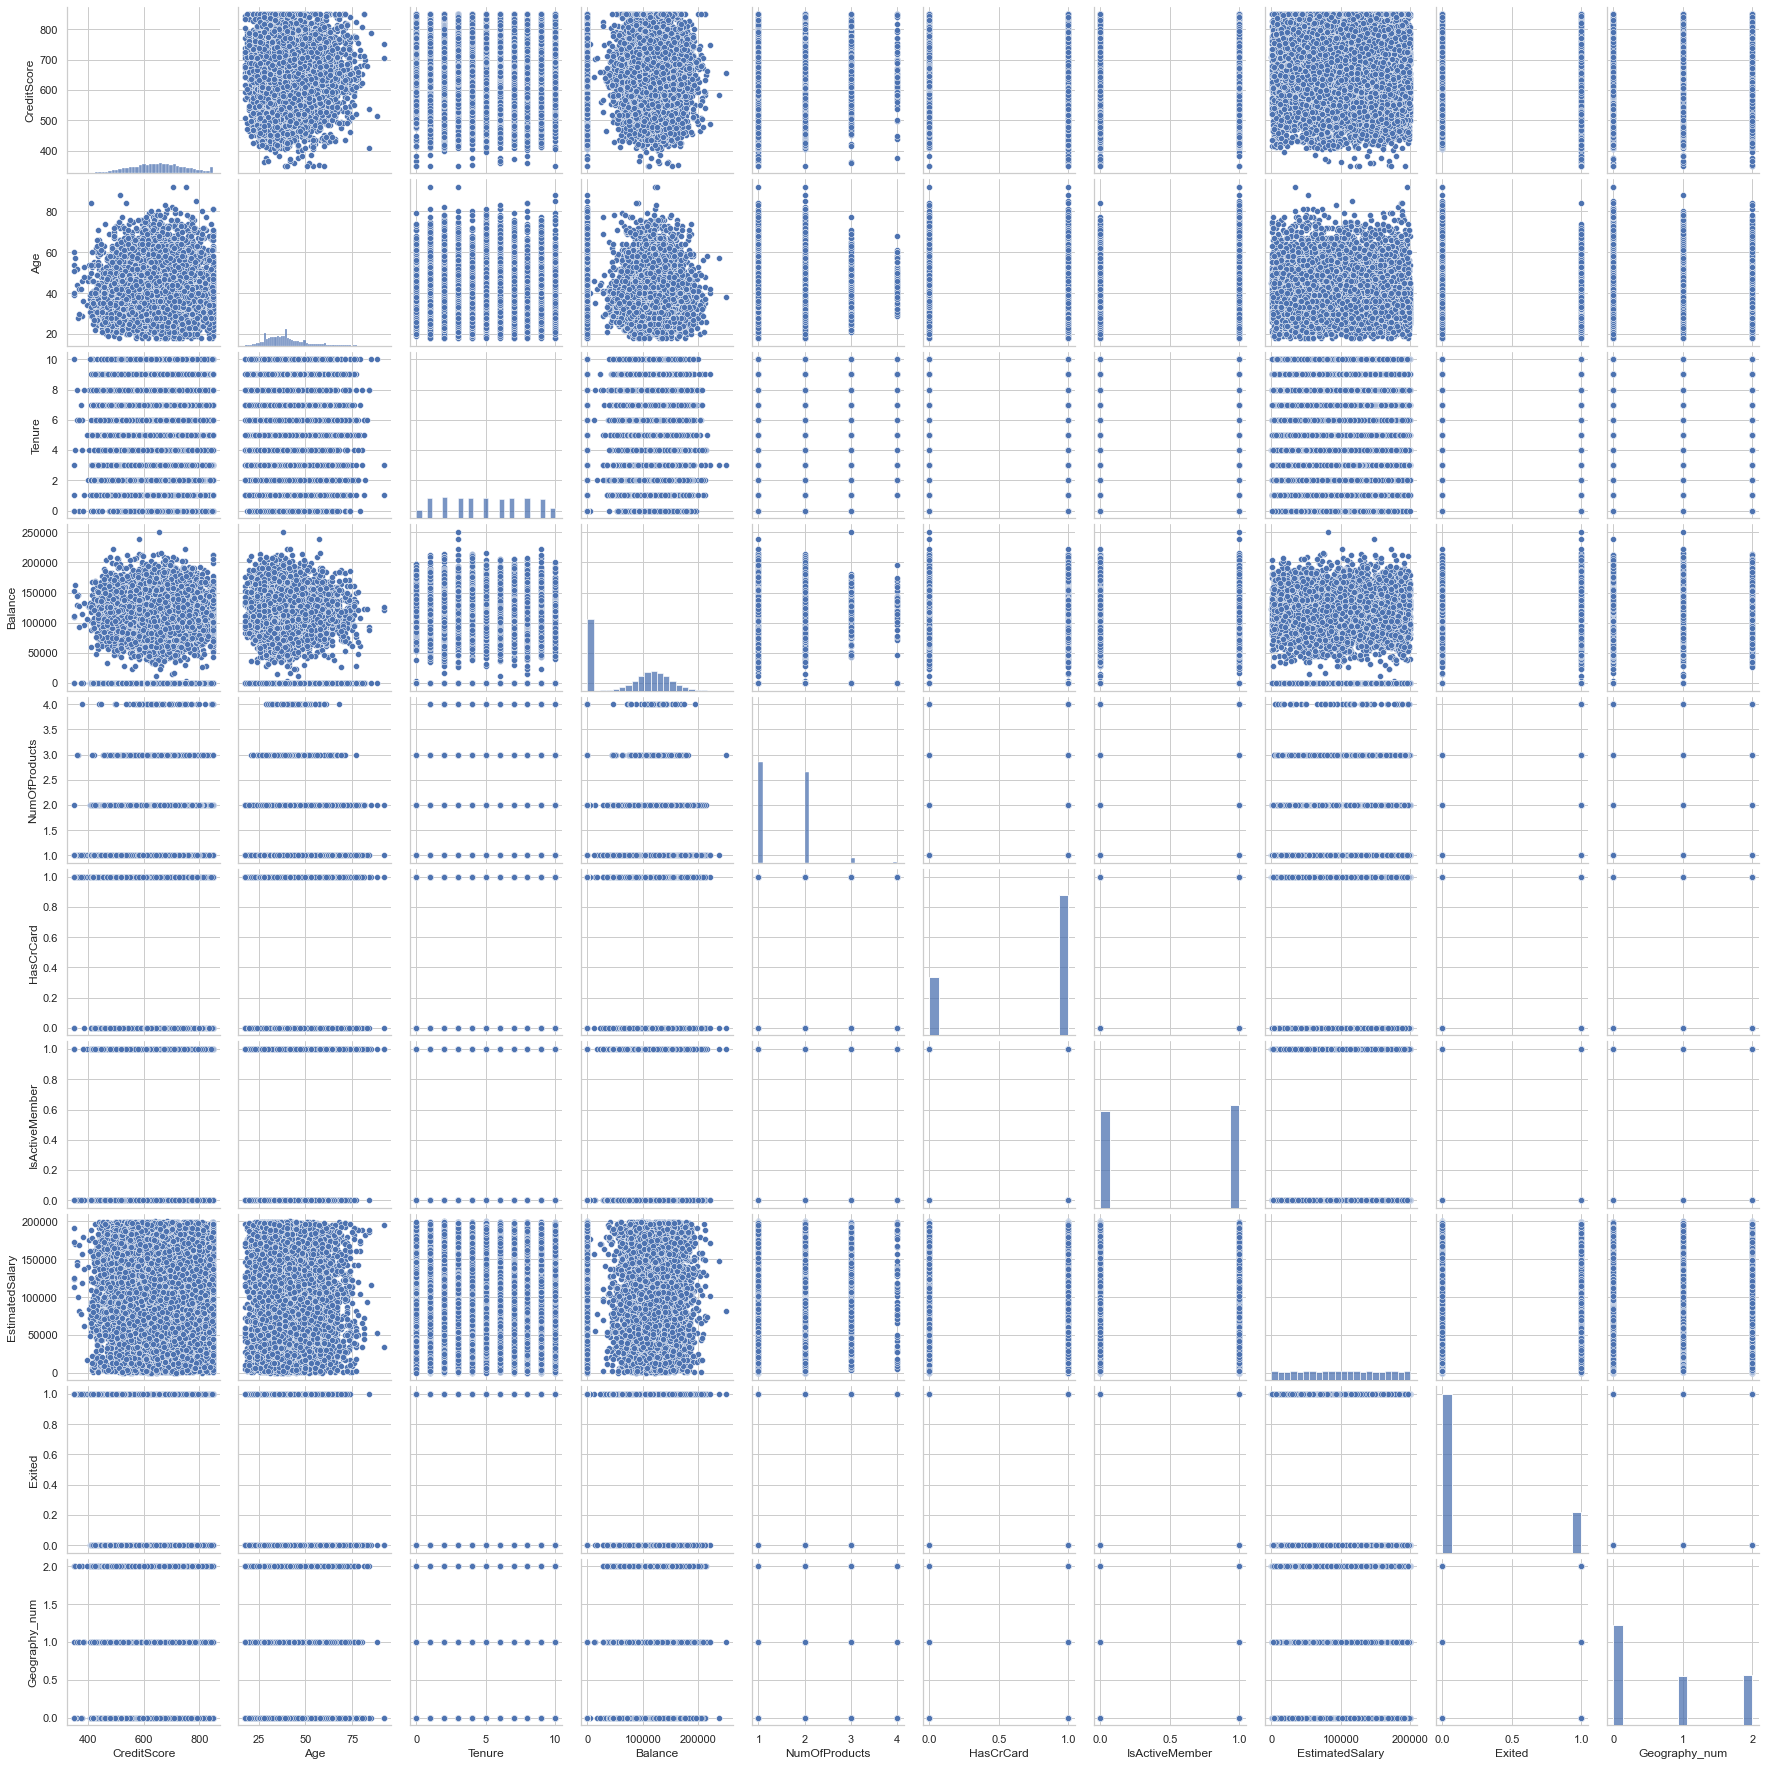

In [38]:
sns.pairplot(df[features_eda])

[Text(1, 0, 'EstimatedSalary'), Text(2, 0, 'Balance')]

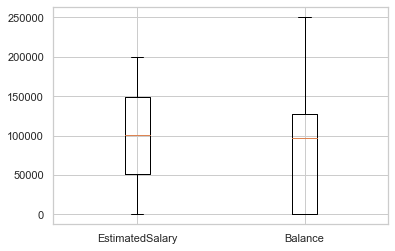

In [39]:
# два бокс-плота на одном графике - построение с помощью matplotlib
my_dict = {'EstimatedSalary': df['EstimatedSalary'], 'Balance': df['Balance']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

<AxesSubplot:xlabel='NumOfProducts', ylabel='EstimatedSalary'>

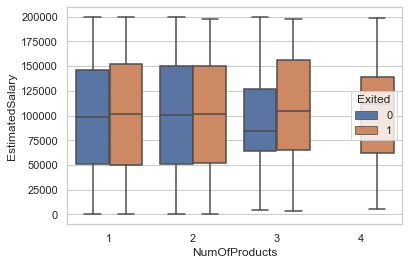

In [40]:
sns.boxplot(data=df, y="EstimatedSalary", x="NumOfProducts", hue="Exited")

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

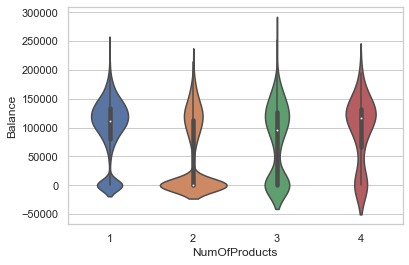

In [41]:
sns.violinplot(data=df, y="Balance", x="NumOfProducts")

In [42]:
# средний баланс в разрезе кол-ва продуктов
df.groupby('NumOfProducts')['Balance'].mean()

NumOfProducts
1    98551.870614
2    51879.145813
3    75458.328195
4    93733.135000
Name: Balance, dtype: float64

<AxesSubplot:xlabel='NumOfProducts'>

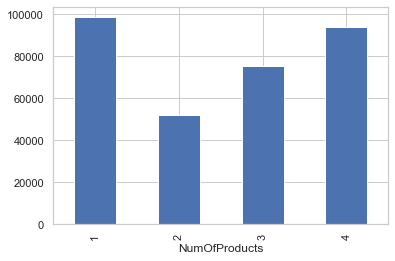

In [43]:
df.groupby('NumOfProducts')['Balance'].mean().plot.bar()

### Многомерный анализ признаков

In [44]:
# сводная таблица - средний баланс в разрезе стран и кол-ва продуктов
result = pd.pivot_table(data=df, index='Geography', columns='NumOfProducts', values='Balance')
result

NumOfProducts,1,2,3,4
Geography,,,,
France,90977.877896,31828.097047,50071.822500,71362.731379
Germany,119868.328139,119341.245038,121572.672396,121442.305417
Spain,90595.373063,32690.852688,48385.897121,91407.651429


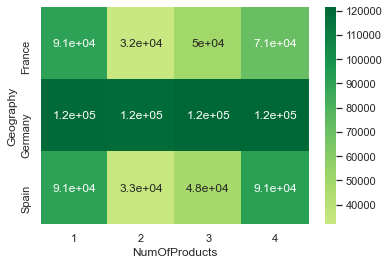

In [45]:
# тепловая карта баланса в разрезе стран и кол-ва продуктов
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

## Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- преобразование типов данных (в т.ч. преобразование категориальных признаков в набор фиктивных бинарных признаков)
- удаление выбросов
- заполнение пропусков
- нормализация (масштабирование) числовых признаков
- формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

### Преобразование типов

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geography_num    10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+ MB


In [51]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,2
8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0,0
9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0,0


In [49]:
# замена значений для указанного признака
df['Gender'].replace('Male', 0, inplace=True)
df['Gender'].replace('Female', 1, inplace=True)

In [ ]:
df['Gender'] = df['Gender'].astype('int64')

### Выявление выбросов

In [53]:
numeric_columns = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

In [54]:
df[numeric_columns].describe()

,CreditScore,Balance,EstimatedSalary,Age
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,100090.239881,38.921800
std,96.653299,62397.405202,57510.492818,10.487806
min,350.000000,0.000000,11.580000,18.000000
25%,584.000000,0.000000,51002.110000,32.000000
50%,652.000000,97198.540000,100193.915000,37.000000
75%,718.000000,127644.240000,149388.247500,44.000000
max,850.000000,250898.090000,199992.480000,92.000000


### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [55]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"])
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


### Формирование дата-сета для обучения моделей

In [56]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [57]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [58]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [59]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']